# (Almost) all the activation functions, illustrated

_This notebook was originally created by Rob Leckeby at Agile Sceintific._

Some activation functions are listed below, then a function to plot them all with their derivatives.

Credit to [Dishashree Gupta](https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/) for the list of functions.

## The sigmoid function

A basic, classical nonlinear function which effectively implements logistic regression in a perceptron.

In [1]:
import numpy as np


def sigmoid(z, *, derivative=False):
    """
    The sigmoid, or logistic function.
    """
    if derivative:
        # In the backward case, z is really sigmoid(z).
        return z * (1 - z)
    return 1 / (1 + np.exp(-z))

In a neural network, we have in incoming signal `x`, over which we compute a linear function, `z = wx + b`, where `w` is a set of weights and `b` a set of biases on a given set of neurons.

We don't need `x`, `b` and `w`, we can just focus on what happens to the computed signal `wx + b` when it passed through our nonlinear function. So let's define `z`, a range of possible values for the computed neural signal:

In [2]:
z = np.linspace(-5, 5, 400)

Now we can compute the activation `a` and its derivative `a_`. Now, although the symbolic definition of the derivative is `sigmoid(z) * (1 - sigmoid(z)`, we defined it as `z * (1 - z)`, because when we do this calculation inside a neural network, the derivative is being computed on `a`, the result of `sigmoid(z)`. So we pass `a` to the function when we calculate the derivative.

In [3]:
a = sigmoid(z)
a_ = sigmoid(a, derivative=True)

Now we can plot these two arrays:

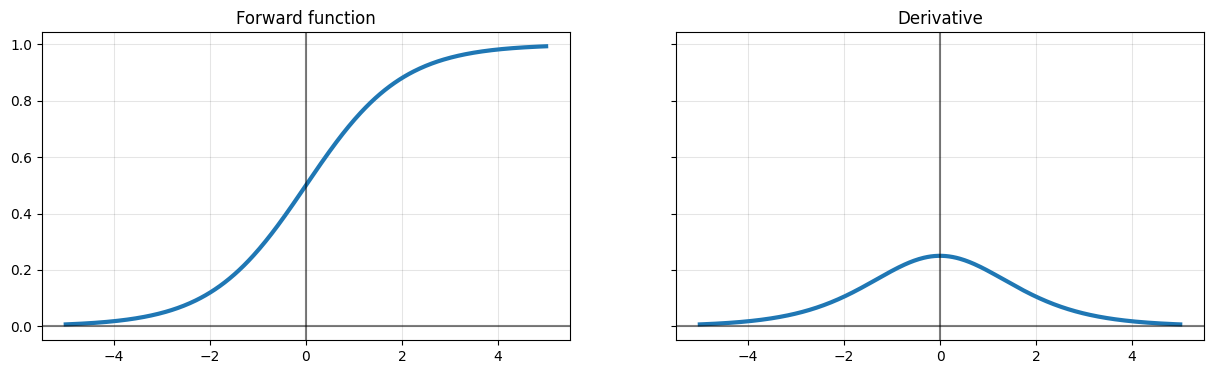

In [4]:
import matplotlib.pyplot as plt

def plot(z, a, a_):
    fig, axs = plt.subplots(ncols=2, figsize=(15, 4), sharey=True)
    ys, titles = [a, a_], ['Forward function', 'Derivative']
    for ax, y, title in zip(axs, ys, titles):
        ax.set_title(title)
        ax.plot(z, y, lw=3)
        ax.grid(c='k', alpha=0.1)
        ax.axhline(0, c='k', alpha=0.5)
        ax.axvline(0, c='k', alpha=0.5)

plot(z, a, a_)

We note that the maximum gradient is quite small (0.25), so activations will get attenuated as they pass through a network using this activation function. This is one of the reasons the `tanh` function became popular.

## `tanh`

We could use NumPy to compute this, but we can also use the exponential definition:

$$ \tanh x = \frac{e^{2x} - 1} {e^{2x} + 1} $$

In [5]:
def tanh(z, *, derivative=False):
    """
    The tanh function and its derivative.
    """
    if derivative:
        return 1 - z**2
    return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)

In [6]:
a = tanh(z)
a_ = tanh(a, derivative=True)

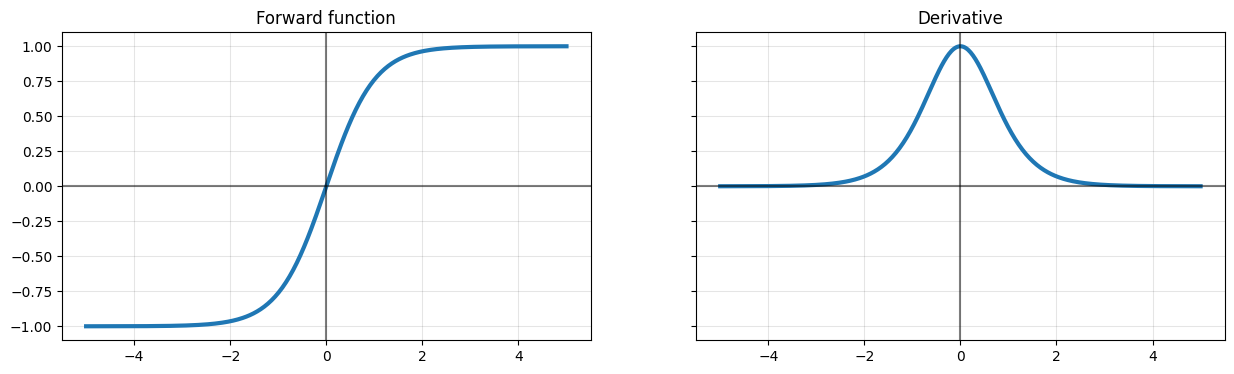

In [7]:
plot(z, a, a_)

---

## Lots more functions!

In [8]:
def linear(z, *, alpha=1, derivative=False):
    """
    A simple scaling function.
    """
    if derivative:
        return np.ones_like(z) * alpha
    return alpha * z

def binary_step(z, *, derivative=False):
    """
    The Heaviside function.
    """
    if derivative:
        return np.zeros_like(z)
    return 1 * (z > 0)

def relu(z, *, derivative=False):
    """
    Rectified Linear Unit (ReLU) (Hahnloser et al., 2000;
    Jarrett et al., 2009; Nair & Hinton, 2010). Special
    case of LReLU, see below.
    """
    if derivative:
        return 1 * (z > 0)
    return z * (z > 0)

def leaky_relu(z, *, alpha=0.01, derivative=False):
    """
    Leaky ReLU (LReLU). (Maas et al., 2013).
    The ReLU is a special case where alpha = 0.
    """
    if derivative:
        return alpha * (z <= 0) + (z > 0)
    return np.maximum(alpha * z, z)

def elu(z, *, alpha=1, derivative=False):
    """
    Exponential Linear Unit (ELU) (Clevert et al., 2015).
    """
    if derivative:
        return np.where(z < 0, alpha * np.exp(z), 1)
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def swish(z, *, derivative=False):
    """
    SWISH: A self-generated activation function.
    https://arxiv.org/pdf/1710.05941v1.pdf
    Special case of E-Swish, see below.
    """
    if derivative:
        return z * sigmoid(z) + sigmoid(z) * (1 - z * sigmoid(z))
    return z * sigmoid(z)

def eswish(z, *, beta=1, derivative=False):
    """
    Eswish https://arxiv.org/abs/1801.07145
    Eswish is a generalization of Swish,
    multiplied by a parameter beta.
    """
    if derivative:
        return beta * z * sigmoid(z) + sigmoid(z) * (beta - beta * z * sigmoid(z))
    return beta * z * sigmoid(z)

Let's plot all of these.

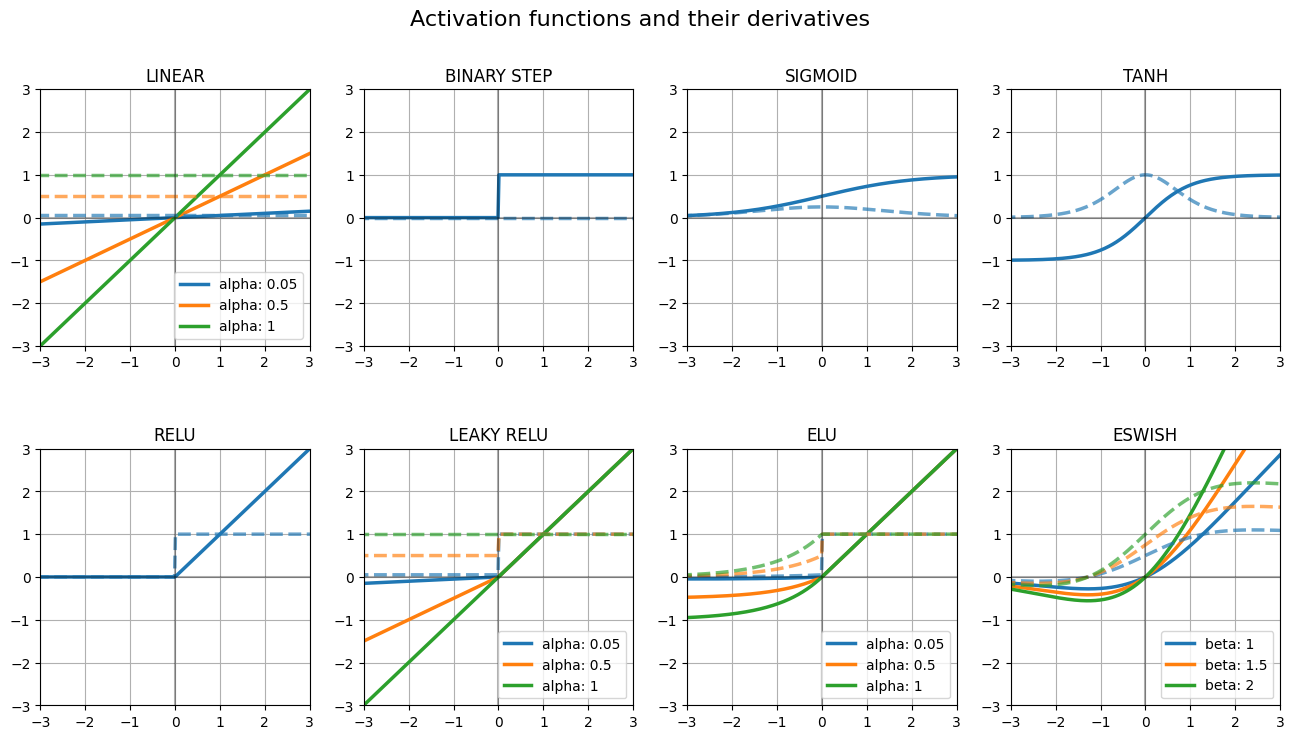

In [9]:
from cycler import cycler

x = np.linspace(-4, 4, 400)
functions = [linear, binary_step, sigmoid, tanh, relu, leaky_relu, elu, eswish]

cyc3 = cycler(color=[u'#1f77b4', u'#ff7f0e', u'#2ca02c'])
props_deriv = {'lw': 2.5, 'ls': '--', 'alpha': 0.67}
props_forward = {'lw': 2.5, 'ls': '-', 'alpha': 1.0}
props_hvlines = {'c': 'k', 'lw': 1.5, 'alpha': 0.3}

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Activation functions and their derivatives', size=16)

for f, ax in zip(functions, axs.flat):
    ax.set_title(f.__name__.upper().replace('_', ' '))

    for d in (False, True):  # Forward and backward functions.
        props = props_deriv if d else props_forward
        if len(kwargs := f.__kwdefaults__) == 1:
            ax.set_prop_cycle(cycler(color=[u'#1f77b4']))
            y = f(x)
            if d:
                y = f(y, derivative=d)
            ax.plot(x, y, label=None, **props)
        else:
            arg, _ = kwargs.keys()
            vals = [1, 1.5, 2] if f is eswish else [0.05, 0.5, 1]
            ax.set_prop_cycle(cyc3)
            for v in vals:
                kwargs.update({arg: v, 'derivative': d})
                y = f(x, **kwargs)
                label = f"{arg}: {v}" if not d else None
                ax.plot(x, y, label=label, **props)
            ax.legend(loc=4)

    ax.grid()
    ax.axhline(0, -3, 3, **props_hvlines)
    ax.axvline(0, -3, 3, **props_hvlines)
    ax.set_xlim(-3, 3); ax.set_ylim(-3, 3)

plt.subplots_adjust(hspace=0.4)
plt.show()

---

&copy; Matt Hall 2024 and Rob Leckenby 2021, licenced CC BY, please share and re-use

# **Activation Functions in Deep Learning**

## **What are Activation Functions?**
In artificial neural networks, each neuron forms a weighted sum of its inputs and passes the resulting scalar value through a function referred to as an activation function or transfer function. If a neuron has n inputs $x_1, x_2, ..., x_n$ then the output of a neuron is:
$$a = g(w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b)$$
The function $g$ is referred to as the activation function. If the function $g$ is taken as the linear function $g(z) = z$ then the neuron performs linear regression or classification. In general $g$ is taken to be a nonlinear function to do nonlinear regression and solve classification problems that are not linearly separable. When $g$ is taken to be a sigmoidal or 's' shaped function varying from 0 to 1 or -1 to 1, the output value of the neuron can be interpreted as a YES/NO answer or binary decision. However saturating activation function can cause the vanishing gradient problem in deep networks. Replacing saturating sigmoidal activation functions with activation functions like ReLU that have larger derivative values allowed deeper networks to be trained for the first time. Non-monotonic and oscillating activation functions that significantly outperform ReLU have since been found. In particular oscillating activation functions improve gradient flow, speedup training and allow single neurons to learn the XOR function like certain human cerebral neurons.

<img src="https://miro.medium.com/v2/resize:fit:1170/1*abHGVMc8bTFVFSvB6ZYaBg.png" width="40%">

## **Why Activation Functions are needed?**
Activation functions are essential in neural networks for the following reasons:

1. **Introduce Non-Linearity**: They allow networks to learn complex, non-linear relationships in data, which linear models can't capture.
   
2. **Enable Deep Learning**: They help in learning hierarchical feature representations, allowing deeper layers to capture more abstract patterns.
   
3. **Universal Approximation**: With activation functions, networks can approximate any continuous function, as per the Universal Approximation Theorem.

4. **Gradient-Based Optimization**: They provide the necessary gradients for training via backpropagation, making learning possible and efficient.

5. **Biological Inspiration**: They mimic the non-linear activation of biological neurons, adding biological plausibility to artificial models.

6. **Output Characteristics**: Different activation functions offer various output ranges, suited for specific tasks like classification.


### **Code Example**

#### **Import Required Libraries**

In [10]:
!pip install mlxtend

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = "Times New Roman"

#### **Make a Dataset**

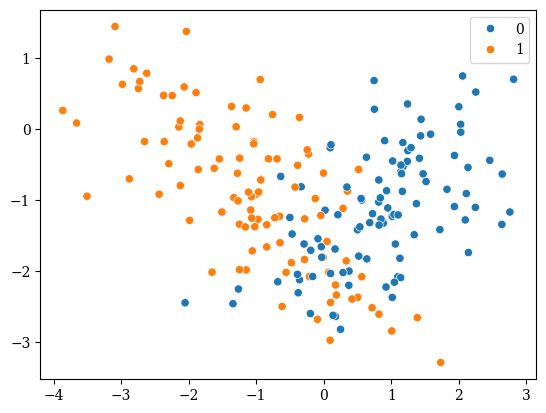

In [12]:
# Generate a classification dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1,
    random_state=32)

# Plot the data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

#### **Neural Network with Linear Activation in the Hidden Layers**

In [13]:
# Build a neural network with linear activation used in the hidden layers
model = Sequential()

model.add(Dense(128, activation="linear", input_dim=2))
model.add(Dense(128, activation="linear"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X, y, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.6094 - loss: 0.6179 - val_accuracy: 0.7750 - val_loss: 0.5540
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8050 - loss: 0.6226 - val_accuracy: 0.7750 - val_loss: 0.3905
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8213 - loss: 0.3917 - val_accuracy: 0.8000 - val_loss: 0.4308
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8247 - loss: 0.4318 - val_accuracy: 0.7750 - val_loss: 0.3650
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8612 - loss: 0.3732 - val_accuracy: 0.7750 - val_loss: 0.3994
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8202 - loss: 0.4019 - val_accuracy: 0.7750 - val_loss: 0.3827
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8102 - loss: 0.4148 - val_accuracy: 0.7750 - val_loss: 0.3883
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8524 - loss: 0.3704 - val_accuracy: 0.7750 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


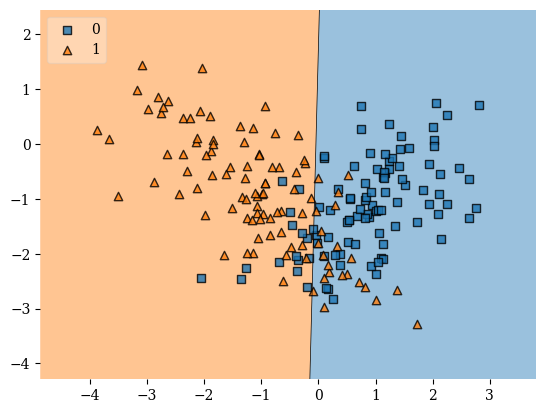

In [14]:
# Plot the decision region
plot_decision_regions(X, y, clf=model, legend=2);

#### **Neural Network with Non-Linear Activation in the Hidden Layers**

In [15]:
# Build a neural network with non-linear activation used in the hidden layers
model = Sequential()

model.add(Dense(128, activation="relu", input_dim=2))
model.add(Dense(128, activation="relu", input_dim=2))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(X, y, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6647 - loss: 0.5697 - val_accuracy: 0.8500 - val_loss: 0.3430
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8055 - loss: 0.4229 - val_accuracy: 0.7750 - val_loss: 0.3909
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8192 - loss: 0.3789 - val_accuracy: 0.8000 - val_loss: 0.3072
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8115 - loss: 0.3450 - val_accuracy: 0.7750 - val_loss: 0.3427
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8537 - loss: 0.2976 - val_accuracy: 0.7750 - val_loss: 0.3350
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8574 - loss: 0.2808 - val_accuracy: 0.9000 - val_loss: 0.3525
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8509 - loss: 0.3097 - val_accuracy: 0.7750 - val_loss: 0.3778
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8364 - loss: 0.3216 - val_accuracy: 0.7750 - val_loss:

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


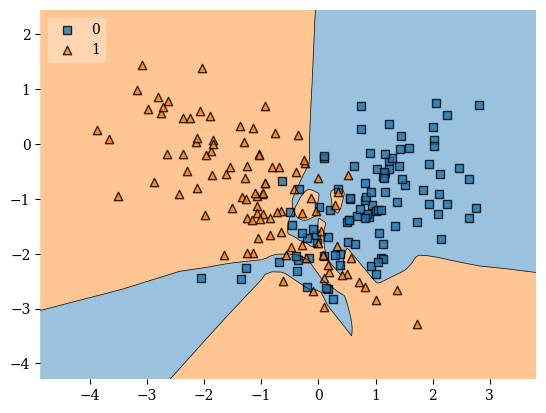

In [16]:
# Plot the decision region
plot_decision_regions(X, y, clf=model, legend=2);

#### **Conclusion**
The first model with linear activations can only separate the data with a straight line, limiting its ability to handle complex patterns.
The second model with ReLU activations in the hidden layers can create a more flexible and complex decision boundary, leading to better performance on non-linear data distributions.

## **Characteristics of an Ideal Activation Function**
An ideal activation function should have the following characteristics:

1. **Non-Linear**: Non-linearity allows the network to model complex patterns and relationships in the data, enabling the network to learn and approximate any function, not just linear relationships.
2. **Differentiable**: Differentiability ensures that the activation function can be used in gradient-based optimization methods, such as backpropagation.
3. **Computationally Inexpensive**: The activation function should be computationally efficient to evaluate, especially for large-scale neural networks, to ensure that training and inference are feasible and fast.
4. **Zero-Centered**: A zero-centered activation function outputs values that are centered around zero, helping to ensure that the gradients are balanced and preventing one side of the weights from dominating.
5. **Non-Saturating**: Non-saturating activation functions do not suffer from the vanishing gradient problem, where gradients become very small, leading to slow learning or no learning at all. For example, functions like ReLU do not saturate in the positive region, allowing gradients to remain significant, thus helping deep networks to continue learning effectively as the number of layers increases.
6. **Smooth**: Smoothness ensures that the activation function doesn’t introduce any abrupt changes in the output, which can help in more stable learning.
7. **Monotonic**: A monotonic function ensures that the gradient doesn't change signs, which can simplify the optimization process.

## **Different Types of Activation Functions**
### **Sigmoid Activation Function**
The sigmoid activation function is a popular activation function used in neural networks, especially in binary classification tasks. It is defined by the following formula:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
where $x$ is the input to the neuron.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*6A3A_rt4YmumHusvTvVTxw.png" width="60%">


**Characteristics of the Sigmoid Activation Function:**

1. **Output Range**: The output of the sigmoid function ranges between 0 and 1. It is useful for models that need to predict probabilities or binary outcomes.

2. **Non-Linearity**: The sigmoid function is non-linear, allowing the network to capture complex patterns.

3. **Smooth and Differentiable**: The sigmoid function is smooth and differentiable, making it suitable for gradient-based optimization methods like backpropagation.

4. **Saturating**: The sigmoid function can saturate, meaning that for very large or very small input values, the output approaches 1 or 0, respectively. This can lead to very small gradients (vanishing gradients), slowing down learning in deep networks.

5. **Not Zero-Centered**: The output is always positive, which can lead to inefficiencies during training since the gradients will also always be positive or always negative.
   
6. **Applications**: Commonly used in the output layer of binary classification models. Also used in the hidden layers of older neural network models, though ReLU and its variants are more commonly used now due to better performance in deeper networks.

### **Tanh Activation Function**
The tanh (hyperbolic tangent) activation function is another widely used activation function in neural networks. It is defined by the following formula:
$$\text{tanh}(x) = \frac{(e^x - e^{-x})}{e^x + e^{-x}}$$
where $x$ is the input to the neuron.

<img src="https://qph.cf2.quoracdn.net/main-qimg-f1baf29cfdb09202b18e2179f4f41bfc" width="60%">

**Characteristics of the Tanh Activation Function:**

1. **Output Range**: The output of the tanh function ranges between $-1$ and $1$. It provides a symmetric output centered around zero, which is an advantage over the sigmoid function.

2. **Non-Linearity**: Like the sigmoid function, tanh is non-linear, allowing the network to model complex relationships.
   
3.  **Smooth and Differentiable**: The tanh function is smooth and differentiable, making it suitable for gradient-based optimization methods like backpropagation.
   
4. **Zero-Centered**: Unlike the sigmoid function, tanh is zero-centered, meaning that the output is symmetrically distributed around zero. This helps in balancing the gradients and making learning more efficient.
   
5. **Saturating**: Tanh can also saturate, meaning for very large or very small input values, the output approaches 1 or -1. This can lead to the vanishing gradient problem, similar to the sigmoid function.
   
6. **Applications**: Often used in hidden layers of neural networks. It was more commonly used before ReLU and its variants became popular due to better performance in deep networks.

### **ReLU Activation Function**
The ReLU (Rectified Linear Unit) activation function is one of the most widely used activation functions in modern neural networks, especially in deep learning. It is defined by the following formula:
$$\text{ReLU}(x) = \text{max}(0, x)$$
where $ x $ is the input to the neuron.

<img src="https://wikidocs.net/images/page/164363/Fig_19_deivrelu.jpg" width="60%">

**Characteristics of the ReLU Activation Function:**

1. **Output Range**: The output of the ReLU function ranges from $0$ to $\infty$. The function outputs zero for any negative input and the input itself for any positive input.
   
2. **Non-Linearity**: ReLU is non-linear, allowing the network to model complex patterns and interactions between features.
   
3. **Computationally Efficient**: ReLU is simple to compute since it only involves a comparison operation, making it computationally efficient.
   
4. **Non-Saturating**: Unlike sigmoid and tanh, ReLU does not saturate for positive inputs, which helps avoid the vanishing gradient problem. This allows for faster learning in deep networks.
   
5. **Not Zero-Centered**: The output of ReLU is not zero-centered since it only outputs non-negative values. This can sometimes cause inefficiencies in learning, but these are usually outweighed by the benefits.

6. **Sparse Activation**: ReLU leads to sparse activation, meaning that in a large network, many neurons will output zero for a given input, which can help with computational efficiency and reducing overfitting.
   
7. **Potential Issue (Dying ReLU)**: A potential drawback of ReLU is the "dying ReLU" problem, where neurons can get stuck outputting zero and stop learning. This happens if the weights are updated in such a way that they always produce a negative input for certain neurons.
   
8. **Variants**: Variants like Leaky ReLU, Parametric ReLU (PReLU), and ELU have been introduced to address the dying ReLU problem by allowing a small, non-zero gradient for negative inputs.

### **Variants of ReLU Activation**

#### **The Dying ReLU Problem**
The Dying ReLU problem occurs in neural networks when neurons become inactive and only output zero for any input, effectively "dying" and ceasing to contribute to the learning process. This problem arises due to the nature of the ReLU activation function, especially during the training process when weights are updated via backpropagation.

During training, if a large number of neurons in a layer consistently receive negative inputs, these neurons will output zero and their gradients will also be zero. Consequently, these neurons do not contribute to the model's learning since their weights do not get updated (because the gradient of ReLU for $ x \leq 0 $ is zero). If too many neurons "die" this way, it can severely degrade the model's performance.

**Mathematical Formulation:**

- Let $a_i$ be the activation of the $(i)$-th neuron after applying ReLU:
    $$a_i = \text{ReLU}(z_i) = \max(0, z_i)$$
    where $z_i = w_i^Tx + b$, with $w_i$ being the weight vector, $x$ the input, and $b_i$ the bias.

- The gradient of the loss function $L$ with respect to input $z_i$ of ReLU is:
    $$  
    \frac{\partial L}{\partial z_i} = \begin{cases}
    \frac{\partial L}{\partial a_i} & \text{if } z_i > 0 \\
    0 & \text{if } z_i \leq 0
    \end{cases}
    $$

- If $ z_i \leq 0 $, the gradient becomes zero, leading to no weight update:
  $$
  \Delta w_i = -\eta \frac{\partial L}{\partial w_i} = 0
  $$
  where $ \eta $ is the learning rate.

#### 1. **Leaky ReLU:**
Leaky ReLU is a variant of the Rectified Linear Unit (ReLU) activation function designed to address the Dying ReLU problem. It is defined by the following formula:
$$
    \text{Leaky ReLU}(x) = \begin{cases}
    x & \text{if } x > 0 \\
    0.01 x & \text{if } x \leq 0
    \end{cases}
$$
where $0.01$ is a small positive constant.

<img src="https://www.researchgate.net/publication/358306930/figure/fig2/AS:1119417702318091@1643901386378/ReLU-activation-function-vs-LeakyReLU-activation-function_W640.jpg" width="60%">

<img src="https://miro.medium.com/v2/resize:fit:2000/1*Ho3rj6FyQTdbQdvOeyACXA.png" width="60%">

**Characteristics:**
1. **Non-Linearity**: Like ReLU, Leaky ReLU is non-linear, allowing the network to capture complex patterns.
   
2. **Non-Zero Gradient for Negative Inputs**: Unlike standard ReLU, which outputs zero for negative inputs, Leaky ReLU assigns a small, non-zero slope for negative inputs. This ensures that the neuron continues to learn, as the gradient is non-zero for negative inputs.
   
3. **Output Range**: The output of Leaky ReLU can range from $-\infty$ to $ \infty $, depending on the input.
   
4. **Avoiding the Dying ReLU Problem**: By allowing a small negative slope for negative inputs, Leaky ReLU prevents neurons from getting stuck and "dying" (outputting zero for all inputs).
   
5. **Differentiable**: The Leaky ReLU function is differentiable, making it compatible with gradient-based optimization methods like backpropagation.
   
6. **Zero-Centered**: Leaky ReLU is not zero-centered, as it outputs positive values for positive inputs and negative values (though small) for negative inputs. However, it still performs well in practice.

#### 2. **Parametric ReLU (PReLU):**
Parametric ReLU (PReLU) is a variant of the ReLU (Rectified Linear Unit) activation function designed to improve upon the standard ReLU and its variant, Leaky ReLU, by allowing the slope of the function for negative inputs to be learned during training. This provides more flexibility and adaptability to the network. It is defined by the following formula:

$$
    \text{PReLU}(x) = \begin{cases}
    x & \text{if } x > 0 \\
    \alpha_i x & \text{if } x \leq 0
    \end{cases}
$$
where $ \alpha_i $ is a learnable parameter for each neuron, rather than a fixed constant like in Leaky ReLU.

<img src="https://blogs.brain-mentors.com/content/images/2022/06/2813863991-5e720eab30026_articlex.png" width="60%">

**Characteristics:**
1. **Learnable Slope**: Unlike Leaky ReLU, where the slope for negative inputs $( \alpha )$ is fixed, PReLU allows this slope to be a parameter that is learned from the data during the training process. This means each neuron can have its own slope $ \alpha_i $ for negative inputs, allowing the network to adapt more effectively to the specific data.
   
2. **Non-Linearity**: Like ReLU and Leaky ReLU, PReLU is non-linear, which enables the network to model complex relationships in the data.
   
3. **Output Range**: The output of PReLU can range from $-\infty$ to $ \infty $, depending on the input.
   
4. **Avoids the Dying ReLU Problem**: Similar to Leaky ReLU, PReLU mitigates the Dying ReLU problem by ensuring that neurons have a non-zero gradient even for negative inputs. However, it improves upon Leaky ReLU by allowing the network to learn the best slope for negative values during training.
   
5. **Differentiable**: PReLU is differentiable, making it compatible with gradient-based optimization methods like backpropagation.
   
6. **Zero-Centered**: Like ReLU and Leaky ReLU, PReLU is not zero-centered, meaning it can output positive or negative values depending on the input.

#### 3. **Exponential Linear Unit (ELU):**
The Exponential Linear Unit (ELU) is an activation function designed to address some of the limitations of the ReLU (Rectified Linear Unit) and its variants. ELU helps to improve the learning dynamics of deep neural networks by introducing a smoother transition from negative to positive values, which can lead to faster learning and better performance. It is defined by the following formula:
$$
\text{ELU}(x) = \begin{cases}
    x & \text{if } x > 0 \\
    \alpha (e^x - 1) & \text{if } x \leq 0
\end{cases}
$$
where $ \alpha $ is a hyperparameter that controls the value to which ELU saturates for negative inputs. Typically, $ \alpha $ is set to 1.

<img src="https://i0.wp.com/sefiks.com/wp-content/uploads/2018/01/elu-derivative.png?resize=654%2C422&ssl=1" width="60%">
<img src="https://tungmphung.com/wp-content/uploads/2020/02/elu_function.png" width="60%">

**Characteristics:**

1. **Non-Linearity**: ELU is a non-linear activation function, which enables the network to model complex patterns in the data.
   
2. **Smoother Transition**: Unlike ReLU, which has a sharp change at $ x = 0 $, ELU provides a smooth and continuous transition between the negative and positive parts of the function. This smoothness can improve the learning dynamics and make optimization easier.
   
3. **Negative Values**: ELU allows negative values for inputs less than zero. This negative output helps to push the mean activation closer to zero, which can make the learning process more efficient by reducing bias shifts.
   
4. **Avoids the Dying ReLU Problem**: ELU helps mitigate the Dying ReLU problem by allowing negative values. Even for negative inputs, ELU outputs a non-zero value (except for large negative inputs where the output saturates to $-\alpha\$, which helps in maintaining active gradients and continued learning.
   
5. **Differentiable**: The ELU function is differentiable, which is essential for backpropagation during training.
   
6. **Output Range**: The output of ELU ranges from $-\alpha$ to $ \infty $. For positive inputs, the output is unbounded, similar to ReLU, while for negative inputs, the output saturates at $-\alpha$.
   
7. **Parameter $ \alpha $**: The parameter $ \alpha $ controls the saturation point for negative inputs. It is usually set to 1, but it can be tuned depending on the specific application.

#### 4. **Scaled Exponential Linear Unit (SELU):**
 The Scaled Exponential Linear Unit (SELU) is an activation function designed to improve the learning dynamics of deep neural networks. It is a self-normalizing activation function, meaning it helps to maintain a mean of zero and unit variance throughout the network, which can significantly enhance training stability and performance. It is defined by the following formula:

 $$
    \text{SELU}(x) = \lambda \begin{cases}
    x & \text{if } x > 0 \\
    \alpha (e^x - 1) & \text{if } x \leq 0
    \end{cases}
 $$

where $ \alpha $ and $ \lambda $ are predefined constants:
   - Typically, $ \alpha \approx 1.6733 $
   - Typically, $ \lambda \approx 1.0507 $


<img src="https://miro.medium.com/v2/resize:fit:1400/1*4IEHWYphW2juRfbCJPQt_w.png" width="60%">

**Characteristics:**
1. **Non-Linearity**: SELU is a non-linear activation function, which enables the network to capture complex patterns in the data.
   
2. **Self-Normalizing**: The primary advantage of SELU is its self-normalizing property. It helps to maintain zero mean and unit variance throughout the layers of the network, which stabilizes the training process and allows for faster convergence.
   
3. **Negative Values**: Similar to ELU, SELU outputs negative values for negative inputs. This negative saturation helps to maintain zero-centered outputs, reducing bias shifts.
   
4. **Avoids the Dying ReLU Problem**: By allowing negative values and ensuring a non-zero gradient for all inputs, SELU helps to avoid the Dying ReLU problem, where neurons stop learning due to zero gradients.
   
5. **Differentiable**: The SELU function is differentiable, making it compatible with gradient-based optimization methods such as backpropagation.
   
6. **Output Range**: The output of SELU ranges from $ \lambda \alpha (e^x - 1) $ for negative inputs to $ \lambda x $ for positive inputs.